In [5]:
import pandas as pd

# 다른 인코딩(CP949)으로 시도
df = pd.read_csv("서울시 대기질 자료 제공_2024.csv", encoding='cp949')

# 상위 5행 확인
df.head()

,일시,구분,미세먼지(PM10),초미세먼지(PM25)
0,2024-12-31 23:00,평균,24.0,12.0
1,2024-12-31 23:00,강남구,18.0,10.0
2,2024-12-31 23:00,강동구,28.0,14.0
3,2024-12-31 23:00,강북구,16.0,9.0
4,2024-12-31 23:00,강서구,25.0,12.0


In [6]:
# '평균' 행은 전체 평균이므로 제외
df_gu = df[df["구분"] != "평균"].copy()

# 구별 PM10 평균 계산
df_avg = df_gu.groupby("구분")[["미세먼지(PM10)", "초미세먼지(PM25)"]].mean().reset_index()

df_avg.head()


,구분,미세먼지(PM10),초미세먼지(PM25)
0,강남구,30.927199,18.209267
1,강동구,30.982545,17.221731
2,강북구,28.713458,16.593154
3,강서구,32.985177,17.075926
4,관악구,34.282977,18.192739


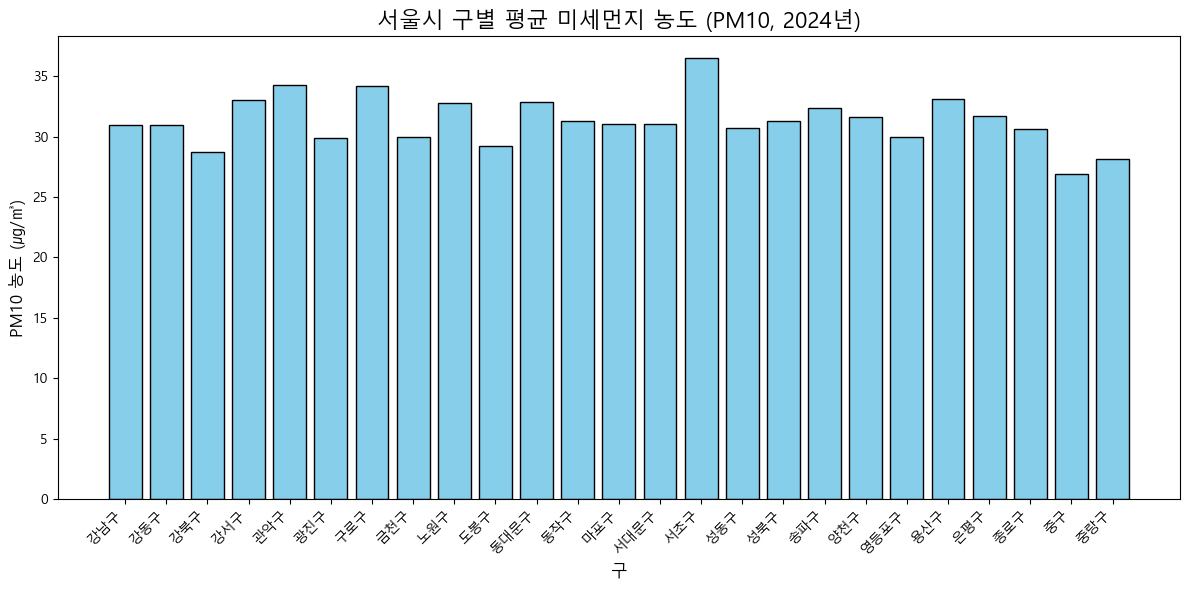

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 깨짐 방지용 폰트 설정 (Windows 기준)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 그래프 크기
plt.figure(figsize=(12,6))

# 막대그래프
plt.bar(df_avg["구분"], df_avg["미세먼지(PM10)"], color='skyblue', edgecolor='black')

# 제목과 라벨
plt.title("서울시 구별 평균 미세먼지 농도 (PM10, 2024년)", fontsize=16)
plt.xlabel("구", fontsize=12)
plt.ylabel("PM10 농도 (㎍/㎥)", fontsize=12)

# x축 라벨 기울이기 (보기 편하게)
plt.xticks(rotation=45, ha='right')

# 그래프 출력
plt.tight_layout()
plt.show()


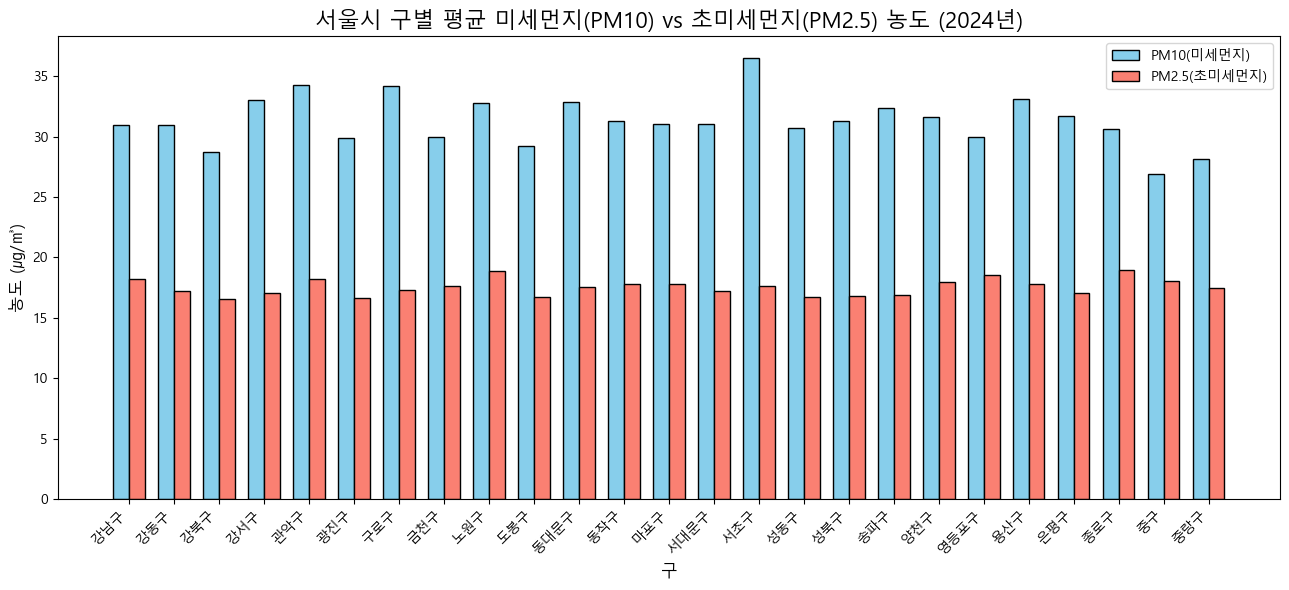

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# x 위치값 설정
x = np.arange(len(df_avg["구분"]))
width = 0.35  # 막대 너비

plt.figure(figsize=(13,6))

# 두 막대그룹: PM10과 PM2.5
plt.bar(x - width/2, df_avg["미세먼지(PM10)"], width, label="PM10(미세먼지)", color='skyblue', edgecolor='black')
plt.bar(x + width/2, df_avg["초미세먼지(PM25)"], width, label="PM2.5(초미세먼지)", color='salmon', edgecolor='black')

# 제목/축 설정
plt.title("서울시 구별 평균 미세먼지(PM10) vs 초미세먼지(PM2.5) 농도 (2024년)", fontsize=16)
plt.xlabel("구", fontsize=12)
plt.ylabel("농도 (㎍/㎥)", fontsize=12)
plt.xticks(x, df_avg["구분"], rotation=45, ha='right')

# 범례 표시
plt.legend()

# 보기 좋게 여백 조정
plt.tight_layout()
plt.show()


In [9]:
import pandas as pd

# 날짜 컬럼을 datetime으로 변환
df["일시"] = pd.to_datetime(df["일시"], errors="coerce")

# 혹시 변환 실패한 값이 있나 확인
df["일시"].isna().sum()


np.int64(0)

C:\Users\kkhw9\AppData\Local\Temp\ipykernel_10712\1804039752.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  seoul_m = seoul.resample("M").mean(numeric_only=True)


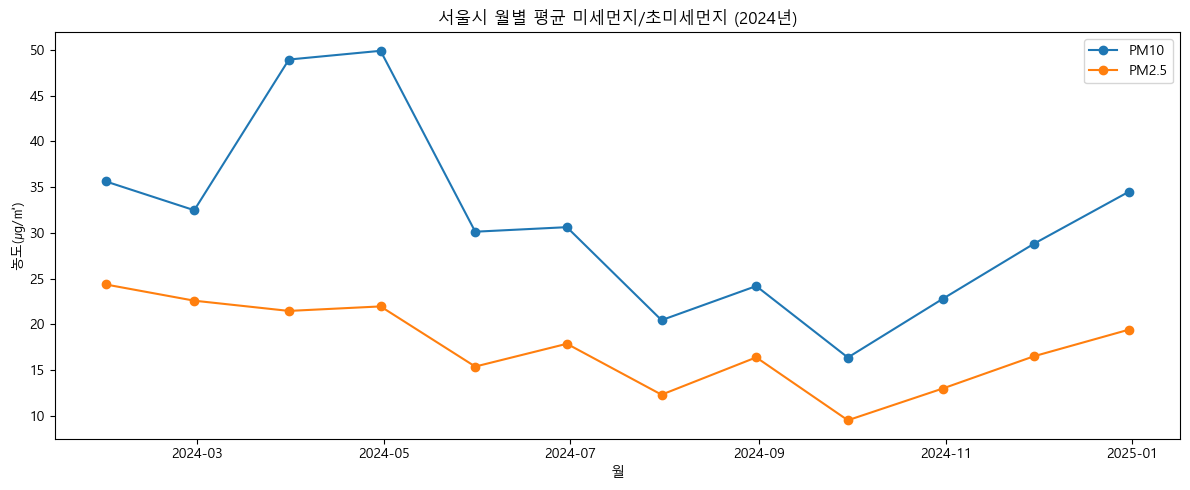

In [10]:
import matplotlib.pyplot as plt

seoul = df[df["구분"] == "평균"].copy()
seoul = seoul.sort_values("일시").set_index("일시")

# 월별 평균
seoul_m = seoul.resample("M").mean(numeric_only=True)

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12,5))
plt.plot(seoul_m.index, seoul_m["미세먼지(PM10)"], marker="o", label="PM10")
plt.plot(seoul_m.index, seoul_m["초미세먼지(PM25)"], marker="o", label="PM2.5")
plt.title("서울시 월별 평균 미세먼지/초미세먼지 (2024년)")
plt.xlabel("월")
plt.ylabel("농도(㎍/㎥)")
plt.legend()
plt.tight_layout()
plt.show()


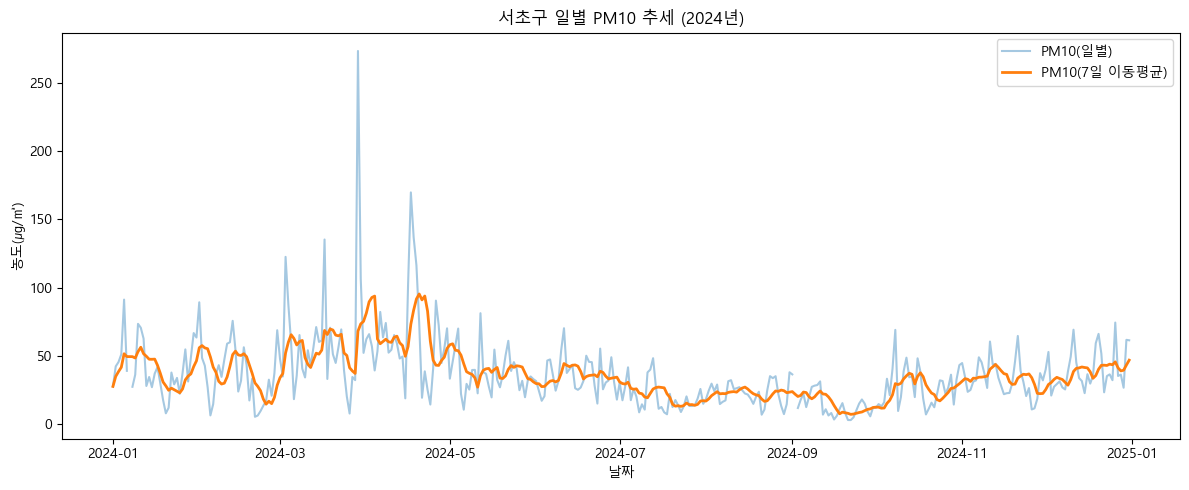

C:\Users\kkhw9\AppData\Local\Temp\ipykernel_10712\4231959586.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gu_m = gu.resample("M").mean(numeric_only=True)


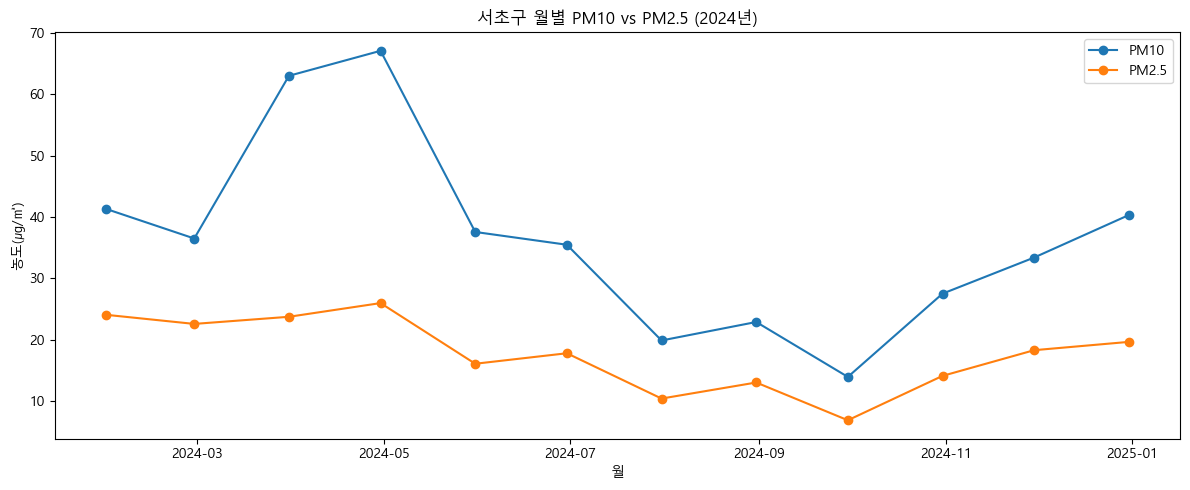

In [11]:
gu_name = "서초구"  # ← 바꾸세요

gu = df[df["구분"] == gu_name].copy()
gu = gu.sort_values("일시").set_index("일시")

# (A) 일별 평균 + 7일 이동평균
gu_d = gu.resample("D").mean(numeric_only=True)
gu_d_ma7 = gu_d.rolling(7, min_periods=1).mean()

plt.figure(figsize=(12,5))
plt.plot(gu_d.index, gu_d["미세먼지(PM10)"], alpha=0.4, label="PM10(일별)")
plt.plot(gu_d_ma7.index, gu_d_ma7["미세먼지(PM10)"], linewidth=2, label="PM10(7일 이동평균)")
plt.title(f"{gu_name} 일별 PM10 추세 (2024년)")
plt.xlabel("날짜"); plt.ylabel("농도(㎍/㎥)"); plt.legend(); plt.tight_layout(); plt.show()

# (B) 월별 평균 (PM10 vs PM2.5)
gu_m = gu.resample("M").mean(numeric_only=True)

plt.figure(figsize=(12,5))
plt.plot(gu_m.index, gu_m["미세먼지(PM10)"], marker="o", label="PM10")
plt.plot(gu_m.index, gu_m["초미세먼지(PM25)"], marker="o", label="PM2.5")
plt.title(f"{gu_name} 월별 PM10 vs PM2.5 (2024년)")
plt.xlabel("월"); plt.ylabel("농도(㎍/㎥)"); plt.legend(); plt.tight_layout(); plt.show()


C:\Users\kkhw9\AppData\Local\Temp\ipykernel_10712\2115805099.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .resample("M").mean(numeric_only=True)["미세먼지(PM10)"])


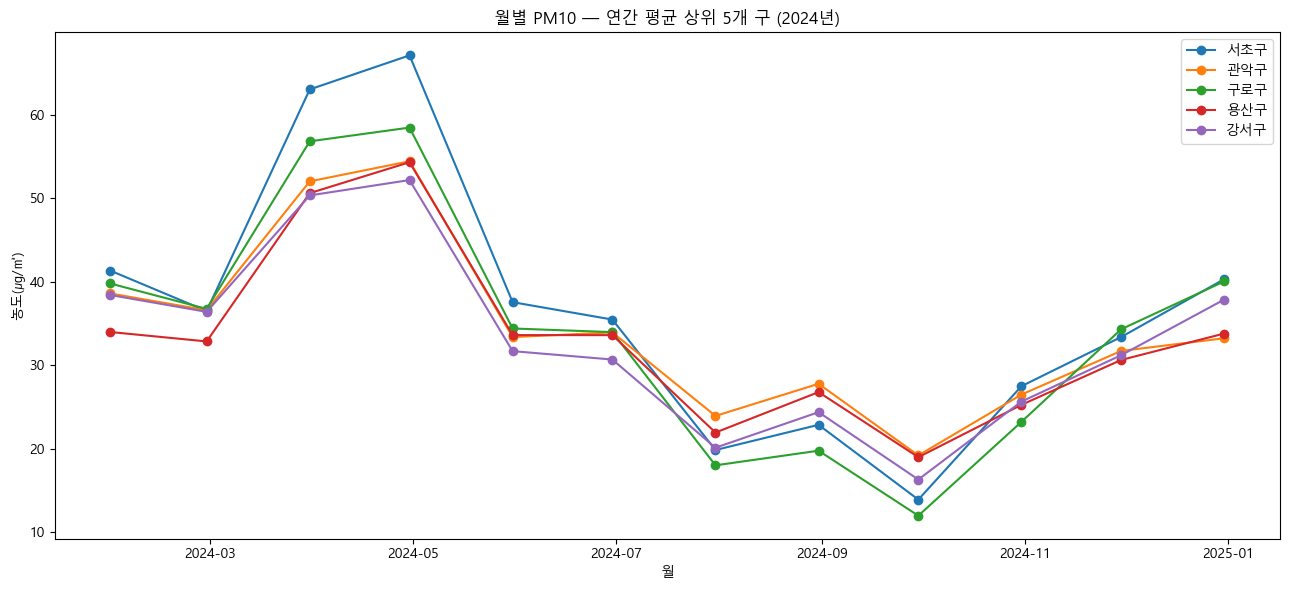

In [12]:
# 구별 연간 평균 PM10 상위 5개 구 선택
df_gu = df[df["구분"] != "평균"].copy()
top5 = (df_gu.groupby("구분")["미세먼지(PM10)"]
        .mean()
        .sort_values(ascending=False)
        .head(5)
        .index.tolist())

plt.figure(figsize=(13,6))
for g in top5:
    g_series = (df_gu[df_gu["구분"] == g]
                .set_index("일시")
                .resample("M").mean(numeric_only=True)["미세먼지(PM10)"])
    plt.plot(g_series.index, g_series.values, marker="o", label=g)

plt.title("월별 PM10 — 연간 평균 상위 5개 구 (2024년)")
plt.xlabel("월"); plt.ylabel("농도(㎍/㎥)"); plt.legend()
plt.tight_layout(); plt.show()


In [13]:
import folium

# 서울시청 중심 좌표
seoul_center = [37.5665, 126.9780]

# 기본 지도 생성
m = folium.Map(
    location=seoul_center,   # 중심좌표
    zoom_start=12,           # 확대 정도 (10~12 정도가 서울시 전역 보기 좋음)
    tiles='CartoDB positron' # 배경지도 (깔끔한 흰색계열)
)

# 서울시청 위치 마커 추가
folium.Marker(
    location=seoul_center,
    popup="서울시청",
    tooltip="서울시청 중심좌표"
).add_to(m)

# 지도 출력
m


In [15]:
import json, folium
import pandas as pd

# 0) df가 이미 메모리에 있다면 이 블록은 건너뛰어도 됩니다.
#    그래도 안전하게 파일명을 맞춰 다시 읽는 코드를 남겨둡니다.
# df = pd.read_csv("서울시 대기질 자료 제공_2024.csv", encoding="cp949")

# 1) 구별 평균 집계 (전체 '평균' 행 제외)
df_gu = df[df["구분"] != "평균"].copy()
df_avg = (df_gu.groupby("구분")[["미세먼지(PM10)", "초미세먼지(PM25)"]]
          .mean()
          .reset_index())

# 2) 서울시청 중심으로 기본 지도
seoul_center = [37.5665, 126.9780]
m = folium.Map(location=seoul_center, zoom_start=11, tiles="CartoDB positron")

# 3) GeoJSON 로드 (서울 자치구 경계)
geo_path = "seoul_municipalities_geo_simple.json"
with open(geo_path, "r", encoding="utf-8") as f:
    seoul_geo = json.load(f)

# 4) GeoJSON 속성에서 구 이름 key 자동 탐색
sample_props = seoul_geo["features"][0]["properties"]
candidates = ["name", "SIG_KOR_NM", "ADM_NM", "adm_nm", "NAME", "SIG_KOR_NM2"]
name_key = next((k for k in candidates if k in sample_props), None)
print("Detected name key:", name_key, "→ 예:", sample_props.get(name_key))

# 5) 이름 정규화 함수 (공백·괄호 제거)
def _norm(s):
    return str(s).replace(" ", "").split("(")[0]

# df와 GeoJSON 이름 정리
df_map = df_avg.rename(columns={"구분":"구"}).copy()
df_map["구"] = df_map["구"].astype(str).str.replace(r"\s+","",regex=True).str.replace(r"\(.*?\)","",regex=True)

gj_names = {_norm(feat["properties"][name_key]) for feat in seoul_geo["features"]}
not_matched = [g for g in df_map["구"] if _norm(g) not in gj_names]
print("매칭 안 된 구:", not_matched)

# 6) Choropleth 레이어 (PM10 기준)
choropleth = folium.Choropleth(
    geo_data=seoul_geo,
    data=df_map,
    columns=["구", "미세먼지(PM10)"],
    key_on=f"feature.properties.{name_key}",
    fill_color="YlOrRd",
    fill_opacity=0.85,
    line_opacity=0.6,
    line_color="white",
    nan_fill_color="lightgray",
    legend_name="평균 PM10 (㎍/㎥)"
).add_to(m)

# 7) 마우스오버 툴팁 + 팝업 값 주입
folium.features.GeoJsonTooltip(
    fields=[name_key],
    aliases=["자치구"],
    labels=True,
    sticky=False
).add_to(choropleth.geojson)

pm10_map = dict(zip(df_map["구"], df_map["미세먼지(PM10)"]))
for feat in choropleth.geojson.data["features"]:
    gname = _norm(feat["properties"][name_key])
    val = next((v for k,v in pm10_map.items() if _norm(k)==gname), None)
    feat["properties"]["popup"] = f"{feat['properties'][name_key]}: PM10 {val if pd.notna(val) else 'N/A'} ㎍/㎥"

folium.GeoJson(
    seoul_geo,
    style_function=lambda x: {"fillOpacity": 0, "color": "white", "weight": 0.5},
    tooltip=folium.GeoJsonTooltip(fields=[name_key], aliases=["자치구"]),
    popup=folium.GeoJsonPopup(fields=["popup"])
).add_to(m)

# 8) 저장 & 표시
out_path = "서울시_PM10_자치구_단계구분도.html"
m.save(out_path)
m


Detected name key: name → 예: 강동구
매칭 안 된 구: []


In [16]:
import pandas as pd
import folium

# 1) df_map에서 (정규화된) 구명 → PM10 값 매핑 딕셔너리 만들기
pm10_map = dict(zip(
    df_map["구"].map(lambda s: _norm(s)),
    df_map["미세먼지(PM10)"]
))

# 2) Choropleth의 GeoJSON feature에 PM10 값을 주입 (툴팁에서 읽어쓸 수 있도록)
for feat in choropleth.geojson.data["features"]:
    gname = _norm(feat["properties"][name_key])
    val = pm10_map.get(gname)
    # 숫자 이외/결측은 None 처리
    feat["properties"]["PM10"] = None if (val is None or pd.isna(val)) else float(val)

# 3) 투명한 GeoJson 레이어를 하나 더 올려서, 툴팁에 '자치구 + PM10' 동시 표시
folium.GeoJson(
    choropleth.geojson.data,
    style_function=lambda x: {"fillOpacity": 0, "color": "transparent", "weight": 0},
    tooltip=folium.GeoJsonTooltip(
        fields=[name_key, "PM10"],
        aliases=["자치구", "PM10(㎍/㎥)"],
        localize=True,
        labels=True,
        sticky=False
    )
).add_to(m)

# 4) 지도 다시 표시 (또는 저장)
m  # 주피터에서 바로 미리보기
# m.save("서울시_PM10_자치구_단계구분도_툴팁.html")


In [17]:
import pandas as pd
import folium

# 1) 정규화된 구명 → 값 매핑
pm10_map = dict(zip(df_map["구"].map(lambda s: _norm(s)), df_map["미세먼지(PM10)"]))
pm25_map = dict(zip(df_map["구"].map(lambda s: _norm(s)), df_map["초미세먼지(PM25)"]))

# 2) feature 속성에 값 주입 (툴팁용, 소수 1자리 문자열로 저장)
for feat in choropleth.geojson.data["features"]:
    gname = _norm(feat["properties"][name_key])

    v10 = pm10_map.get(gname)
    v25 = pm25_map.get(gname)

    v10_s = "" if (v10 is None or pd.isna(v10)) else f"{float(v10):.1f}"
    v25_s = "" if (v25 is None or pd.isna(v25)) else f"{float(v25):.1f}"

    # 숫자/문자 형태 둘 다 저장 (필요시 활용)
    feat["properties"]["PM10"] = None if v10_s=="" else float(v10_s)
    feat["properties"]["PM25"] = None if v25_s=="" else float(v25_s)
    feat["properties"]["PM10_s"] = v10_s
    feat["properties"]["PM25_s"] = v25_s

# 3) 투명 레이어로 툴팁 추가 (자치구명 + PM10 + PM2.5)
folium.GeoJson(
    choropleth.geojson.data,
    style_function=lambda x: {"fillOpacity": 0, "color": "transparent", "weight": 0},
    tooltip=folium.GeoJsonTooltip(
        fields=[name_key, "PM10_s", "PM25_s"],
        aliases=["자치구", "PM10(㎍/㎥)", "PM2.5(㎍/㎥)"],
        localize=True,
        labels=True,
        sticky=False
    )
).add_to(m)

# 4) 미리보기/저장
m
# m.save("서울시_PM10_PM25_툴팁.html")


# 서울시 자치구별 연료별 차종별 용도별 등록현황(25년06월)


In [21]:
pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


PM10-등록대수 r = -0.216
PM2.5-등록대수 r = 0.314


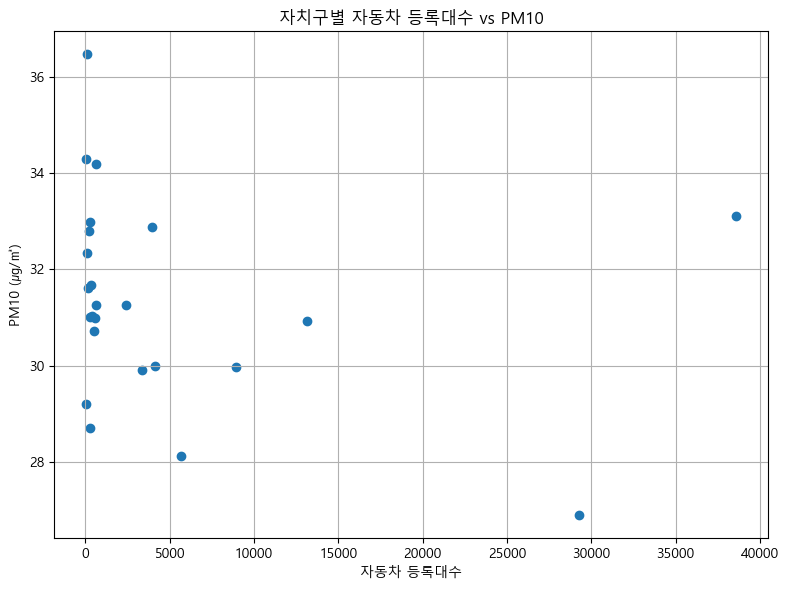

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# 1) 자동차 등록대수 (방금 정리한 CSV) 불러오기
df_car = pd.read_csv("서울시_자치구_자동차등록현황_2025-06_정리.csv", encoding="utf-8-sig")

# 2) 미세먼지 평균(df_avg)에서 컬럼 이름 맞추기
#    df_avg: ['구분','미세먼지(PM10)','초미세먼지(PM25)'] 라고 가정
df_air = df_avg.rename(columns={"구분":"구"}).copy()

# 3) 병합
df_merge = pd.merge(df_air, df_car, on="구", how="inner")

# 4) 상관계수 계산
r_pm10 = df_merge["미세먼지(PM10)"].corr(df_merge["등록대수"])
r_pm25 = df_merge["초미세먼지(PM25)"].corr(df_merge["등록대수"])
print(f"PM10-등록대수 r = {r_pm10:.3f}")
print(f"PM2.5-등록대수 r = {r_pm25:.3f}")

# 5) 산점도 (PM10 기준)
plt.figure(figsize=(8,6))
plt.scatter(df_merge["등록대수"], df_merge["미세먼지(PM10)"])
plt.title("자치구별 자동차 등록대수 vs PM10")
plt.xlabel("자동차 등록대수")
plt.ylabel("PM10 (㎍/㎥)")
plt.grid(True)
plt.tight_layout()
plt.show()


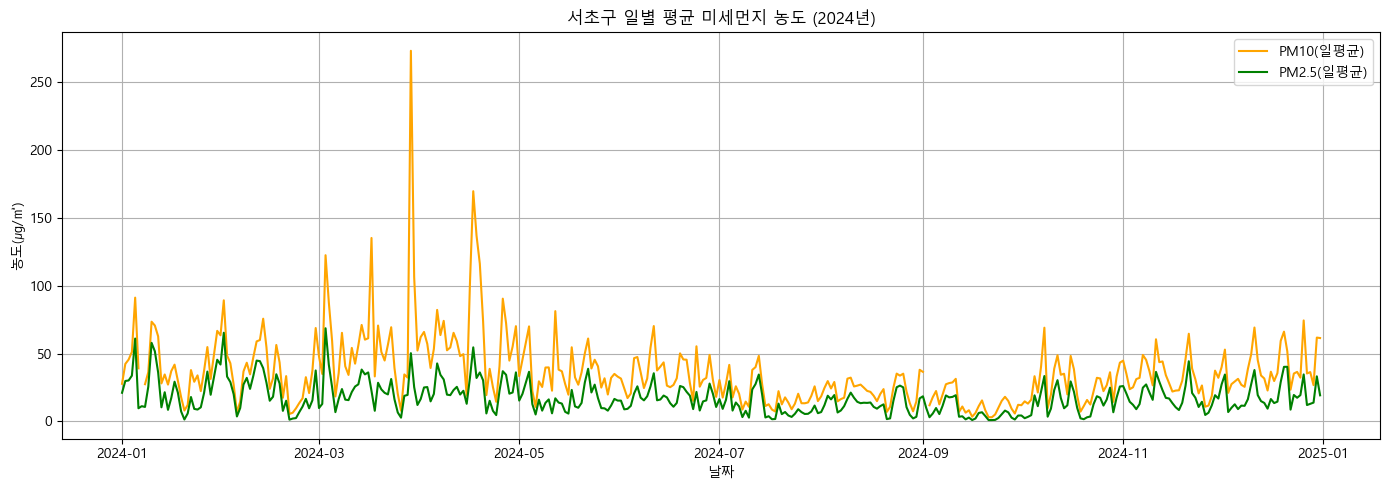

In [27]:
# 일별 평균
df_sc_day = df_sc.resample("D", on="일시").mean(numeric_only=True)

plt.figure(figsize=(14,5))
plt.plot(df_sc_day.index, df_sc_day["미세먼지(PM10)"], label="PM10(일평균)", color='orange')
plt.plot(df_sc_day.index, df_sc_day["초미세먼지(PM25)"], label="PM2.5(일평균)", color='green')
plt.title("서초구 일별 평균 미세먼지 농도 (2024년)")
plt.xlabel("날짜")
plt.ylabel("농도(㎍/㎥)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


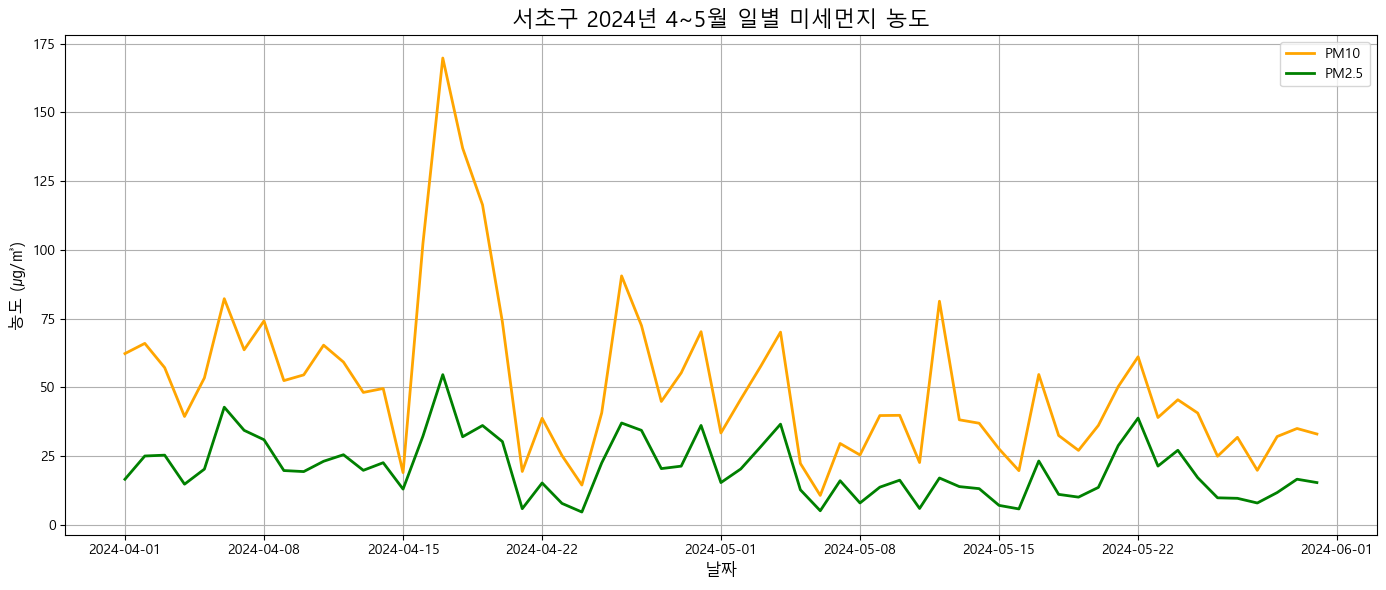

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# 한글 폰트 설정 (Windows용)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) 서초구 데이터만 선택
df_sc = df[df["구분"] == "서초구"].copy()

# 2) 일시를 datetime으로 변환
df_sc["일시"] = pd.to_datetime(df_sc["일시"], errors="coerce")

# 3) 2024년 4~5월 구간 필터링
mask = (df_sc["일시"] >= "2024-04-01") & (df_sc["일시"] < "2024-06-01")
df_sc_period = df_sc.loc[mask]

# 4) 일별 평균 계산
df_sc_day = df_sc_period.resample("D", on="일시").mean(numeric_only=True)

# 5) 그래프
plt.figure(figsize=(14,6))
plt.plot(df_sc_day.index, df_sc_day["미세먼지(PM10)"], label="PM10", color="orange", linewidth=2)
plt.plot(df_sc_day.index, df_sc_day["초미세먼지(PM25)"], label="PM2.5", color="green", linewidth=2)
plt.title("서초구 2024년 4~5월 일별 미세먼지 농도", fontsize=16)
plt.xlabel("날짜", fontsize=12)
plt.ylabel("농도 (㎍/㎥)", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


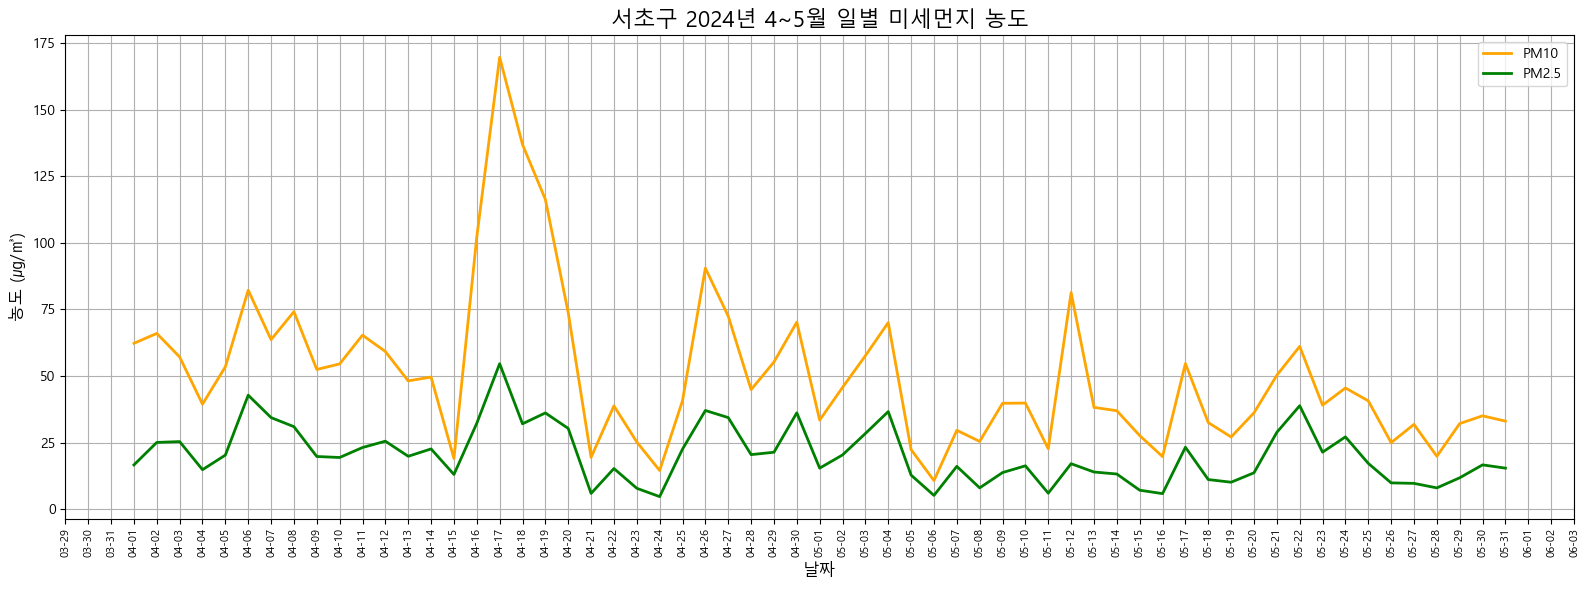

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) 서초구만 선택
df_sc = df[df["구분"] == "서초구"].copy()

# 2) 일시를 datetime으로 변환
df_sc["일시"] = pd.to_datetime(df_sc["일시"], errors="coerce")

# 3) 4~5월 필터
mask = (df_sc["일시"] >= "2024-04-01") & (df_sc["일시"] < "2024-06-01")
df_sc_period = df_sc.loc[mask]

# 4) 일별 평균 계산
df_sc_day = df_sc_period.resample("D", on="일시").mean(numeric_only=True)

# 5) 그래프
plt.figure(figsize=(16,6))
plt.plot(df_sc_day.index, df_sc_day["미세먼지(PM10)"], label="PM10", color="orange", linewidth=2)
plt.plot(df_sc_day.index, df_sc_day["초미세먼지(PM25)"], label="PM2.5", color="green", linewidth=2)

plt.title("서초구 2024년 4~5월 일별 미세먼지 농도", fontsize=16)
plt.xlabel("날짜", fontsize=12)
plt.ylabel("농도 (㎍/㎥)", fontsize=12)
plt.legend()
plt.grid(True)

# 🔹 날짜 눈금 설정 (하루 단위로 모두 표시)
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d'))

# 🔹 x축 라벨 기울기 & 간격 조정
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()


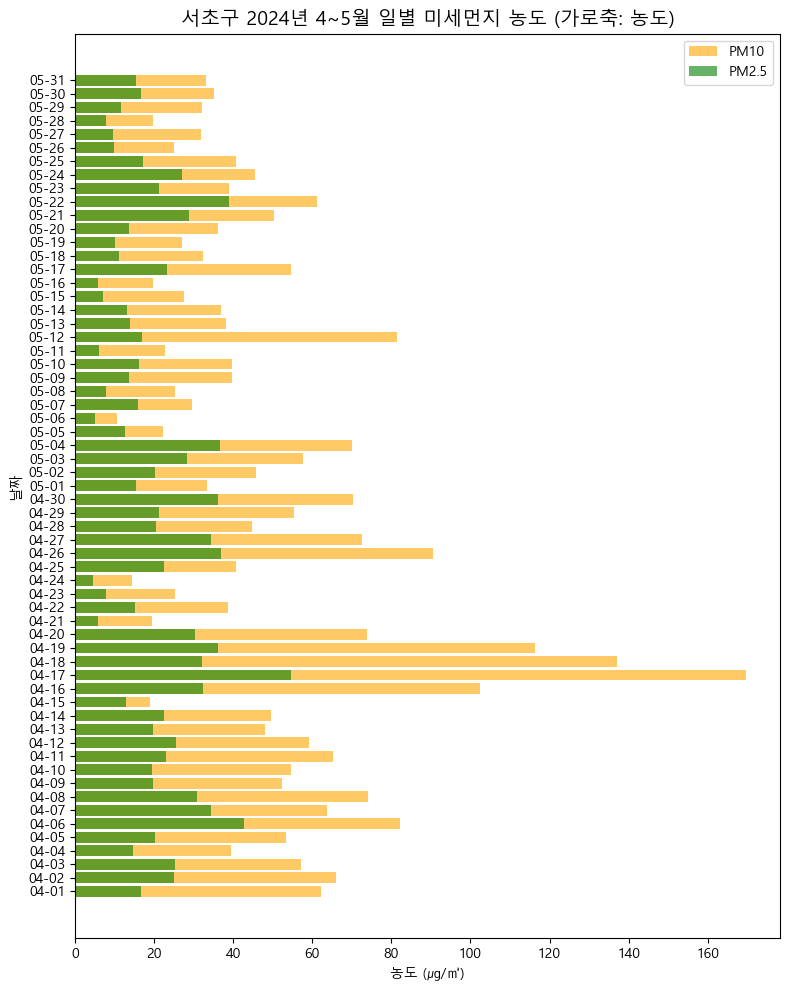

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# 1) 서초구 데이터 필터
df_sc = df[df["구분"] == "서초구"].copy()
df_sc["일시"] = pd.to_datetime(df_sc["일시"], errors="coerce")
mask = (df_sc["일시"] >= "2024-04-01") & (df_sc["일시"] < "2024-06-01")
df_sc_period = df_sc.loc[mask]

# 2) 일별 평균
df_sc_day = df_sc_period.resample("D", on="일시").mean(numeric_only=True)

# 3) 가로막대형 그래프 (x축: 농도, y축: 날짜)
plt.figure(figsize=(8,10))

plt.barh(df_sc_day.index.strftime("%m-%d"), df_sc_day["미세먼지(PM10)"], 
         color='orange', alpha=0.6, label="PM10")
plt.barh(df_sc_day.index.strftime("%m-%d"), df_sc_day["초미세먼지(PM25)"], 
         color='green', alpha=0.6, label="PM2.5")

plt.title("서초구 2024년 4~5월 일별 미세먼지 농도 (가로축: 농도)", fontsize=14)
plt.xlabel("농도 (㎍/㎥)")
plt.ylabel("날짜")
plt.legend()
plt.tight_layout()
plt.show()
